# Лабораторная работа №4 (Проведение исследований со случайным лесом)

## 2. Создание бейзлайна и оценка качества

Перейдем к созданию базовых моделей

### Классификация

Загрузим датасет и посмотрим на данные

In [1]:
import pandas as pd

df_class = pd.read_csv('data/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

print(f"Размерность данных")
print(df_class.shape)
print(f"\nИнформация о данных")
print(df_class.info())
print(f"\nПервые 5 строк")
print(df_class.head())
print(f"\nРаспределение классов")
print(df_class['class'].value_counts())

Размерность данных
(10000, 18)

Информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)

Выделим исходные признаки, которые непосредственно описывают физические свойства объектов и целевую переменную. А также закодируем таргет, так как это категориальный признак.

In [2]:
from sklearn.preprocessing import LabelEncoder

X_class = df_class[['u', 'g', 'r', 'i', 'z', 'redshift']]
y_class = df_class['class']

le = LabelEncoder()
y_class_encoded = le.fit_transform(y_class)
class_names = le.classes_

Разделим данные на выборку для обучения и тестовую выборку.

In [3]:
from sklearn.model_selection import train_test_split

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class_encoded, test_size=0.2, random_state=42
)

Обучим базовую модель Random Forest и выполним предсказания на тестовой выборке.

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_class, y_train_class)

y_pred_class = rf_classifier.predict(X_test_class)

Опишем функцию, которая будет использоваться для оценки обученной модели классификации.

1. Accuracy: 0.9900

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.988978 0.990964  0.989970
   QSO   0.983607 0.947368  0.965147
  STAR   0.992674 0.998771  0.995713

3. Macro F1: 0.9836

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     987    3     6
QSO         10  180     0
STAR         1    0   813


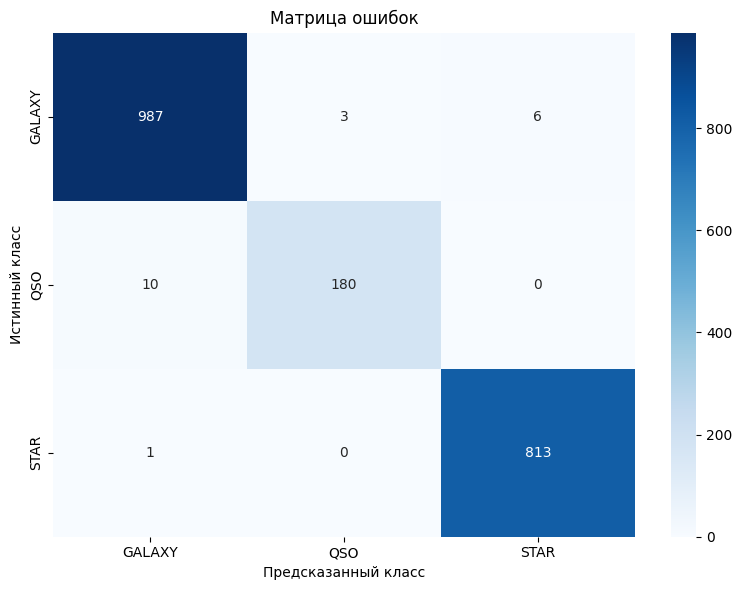

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix
)

def evaluate_classification_model(y_true, y_pred, class_names):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"1. Accuracy: {accuracy:.4f}")
    
    print(f"\n2. Метрики по классам:")
    precision = precision_score(y_true, y_pred, average=None)
    recall = recall_score(y_true, y_pred, average=None)
    f1 = f1_score(y_true, y_pred, average=None)
    
    metrics_df = pd.DataFrame({
        'Класс': class_names,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })
    print(metrics_df.to_string(index=False))
    
    macro_f1 = f1_score(y_true, y_pred, average='macro')
    print(f"\n3. Macro F1: {macro_f1:.4f}")
    
    print(f"\n4. Матрица ошибок:")
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
    print(cm_df)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Матрица ошибок')
    plt.ylabel('Истинный класс')
    plt.xlabel('Предсказанный класс')
    plt.tight_layout()
    plt.show()
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'macro_f1': macro_f1,
        'confusion_matrix': cm
    }

class_metrics = evaluate_classification_model(y_test_class, y_pred_class, class_names)

### Регрессия

Загрузим датасет и посмотрим на данные

In [6]:
df_reg = pd.read_csv('data/abalone.csv')

print(f"Размерность данных")
print(df_reg.shape)
print(f"\nИнформация о данных")
print(df_reg.info())
print(f"\nПервые 5 строк")
print(df_reg.head())
print(f"\nСтатистика по числовым признакам")
print(df_reg.describe())

Размерность данных
(4177, 9)

Информация о данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None

Первые 5 строк
  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.4

Выделим признаки и целевую переменную. Закодируем категориальный признак Sex.

In [7]:
X_reg = df_reg.drop('Rings', axis=1)
y_reg = df_reg['Rings']

le_sex = LabelEncoder()
X_reg_encoded = X_reg.copy()
X_reg_encoded['Sex'] = le_sex.fit_transform(X_reg['Sex'])

Разделим данные на выборку для обучения и тестовую выборку.

In [8]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_encoded, y_reg, test_size=0.2, random_state=42
)

Обучим базовую модель Random Forest и выполним предсказания на тестовой выборке.

In [9]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)

y_pred_reg = rf_regressor.predict(X_test_reg)

Опишем функцию, которая будет использоваться для оценки обученной модели регрессии.

In [10]:
import numpy as np
from sklearn.metrics import (
    mean_absolute_error, 
    mean_squared_error, 
    r2_score,
)

def evaluate_regression_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    print(f"1. MAE: {mae:.4f}")

    mse = mean_squared_error(y_true, y_pred)
    print(f"\n2. MSE: {mse:.4f}")
    
    rmse = np.sqrt(mse)
    print(f"\n3. RMSE: {rmse:.4f}")
    
    r2 = r2_score(y_true, y_pred)
    print(f"\n4. R²: {r2:.4f}")
    
    return {
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }

reg_metrics = evaluate_regression_model(y_test_reg, y_pred_reg)

1. MAE: 1.5899

2. MSE: 5.0915

3. RMSE: 2.2564

4. R²: 0.5297


## 3. Улучшение бейзлайна

Перейдем к формулированию и проверкам гипотез

### Классификация

**Гипотеза 1:** Стандартизация признаков улучшит качество модели.

Результаты с стандартизацией:
1. Accuracy: 0.9900

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.988978 0.990964  0.989970
   QSO   0.983607 0.947368  0.965147
  STAR   0.992674 0.998771  0.995713

3. Macro F1: 0.9836

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     987    3     6
QSO         10  180     0
STAR         1    0   813


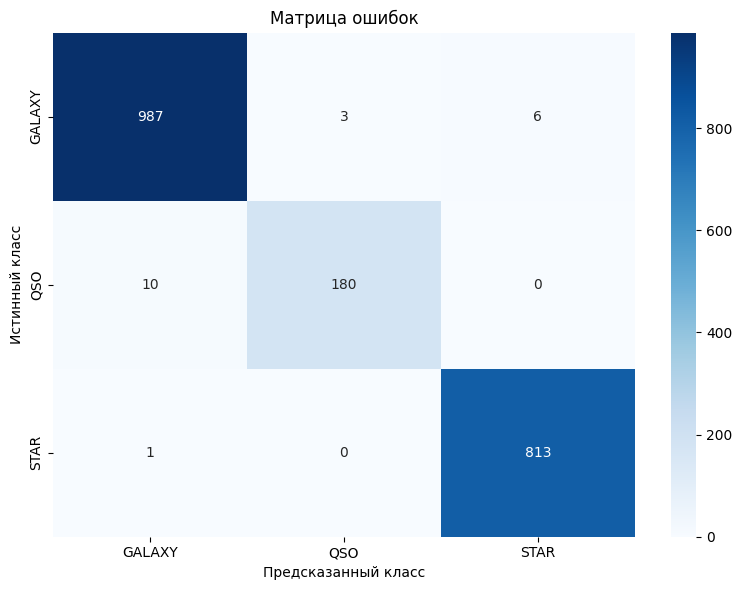

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold

scaler = StandardScaler()
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)

rf_classifier_scaled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_scaled.fit(X_train_class_scaled, y_train_class)
y_pred_class_scaled = rf_classifier_scaled.predict(X_test_class_scaled)

print("Результаты с стандартизацией:")
metrics_scaled = evaluate_classification_model(y_test_class, y_pred_class_scaled, class_names)

**Гипотеза 2:** Подбор гиперпараметров на кросс-валидации улучшит качество модели.

Лучшие параметры: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Лучший score на кросс-валидации: 0.9797

Результаты с подобранными гиперпараметрами:
1. Accuracy: 0.9915

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.990973 0.991968  0.991470
   QSO   0.983784 0.957895  0.970667
  STAR   0.993888 0.998771  0.996324

3. Macro F1: 0.9862

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     988    3     5
QSO          8  182     0
STAR         1    0   813


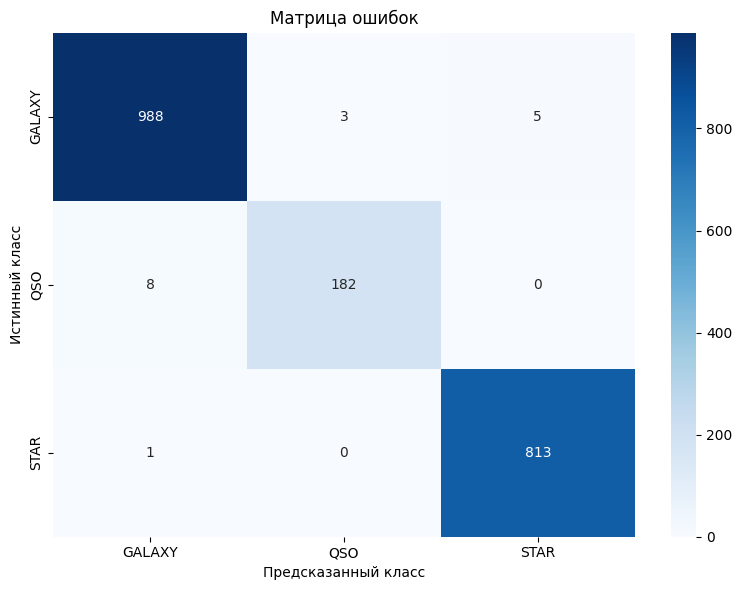

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf_grid = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_grid, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train_class, y_train_class)

print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший score на кросс-валидации: {grid_search.best_score_:.4f}")

rf_classifier_tuned = grid_search.best_estimator_
y_pred_class_tuned = rf_classifier_tuned.predict(X_test_class)

print("\nРезультаты с подобранными гиперпараметрами:")
metrics_tuned = evaluate_classification_model(y_test_class, y_pred_class_tuned, class_names)

Сравним результаты всех вариантов

In [13]:
comparison_class = pd.DataFrame({
    'Модель': ['Базовый бейзлайн', 'Со стандартизацией', 'С подобранными гиперпараметрами'],
    'Accuracy': [class_metrics['accuracy'], metrics_scaled['accuracy'], metrics_tuned['accuracy']],
    'Macro F1': [class_metrics['macro_f1'], metrics_scaled['macro_f1'], metrics_tuned['macro_f1']]
})

print("Сравнение моделей классификации:")
print(comparison_class.to_string(index=False))

Сравнение моделей классификации:
                         Модель  Accuracy  Macro F1
               Базовый бейзлайн    0.9900  0.983610
             Со стандартизацией    0.9900  0.983610
С подобранными гиперпараметрами    0.9915  0.986153


Сформируем улучшенный бейзлайн на основе лучших результатов. Используем подобранные гиперпараметры.

Результаты улучшенного бейзлайна (классификация):
1. Accuracy: 0.9915

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.990973 0.991968  0.991470
   QSO   0.983784 0.957895  0.970667
  STAR   0.993888 0.998771  0.996324

3. Macro F1: 0.9862

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     988    3     5
QSO          8  182     0
STAR         1    0   813


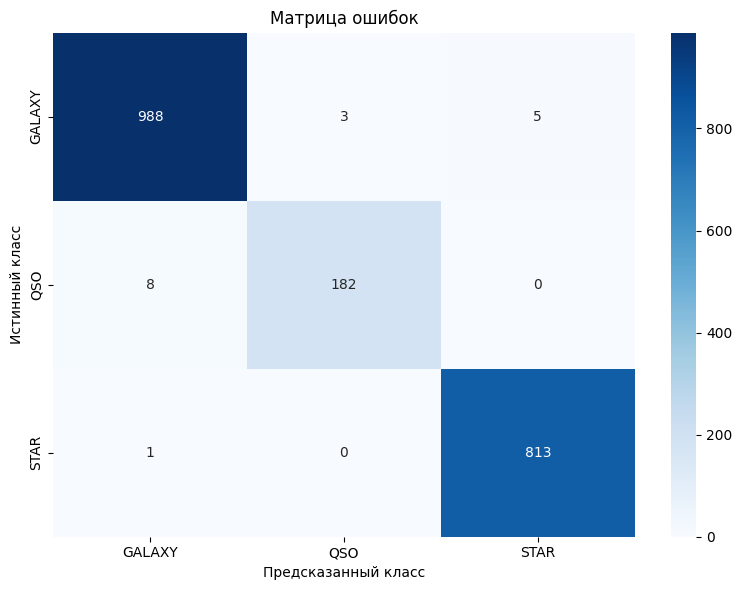

In [14]:
rf_classifier_improved = RandomForestClassifier(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    random_state=42
)
rf_classifier_improved.fit(X_train_class, y_train_class)
y_pred_class_improved = rf_classifier_improved.predict(X_test_class)

print("Результаты улучшенного бейзлайна (классификация):")
class_metrics_improved = evaluate_classification_model(y_test_class, y_pred_class_improved, class_names)

### Регрессия

**Гипотеза 1:** Стандартизация признаков улучшит качество модели.

In [15]:
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

rf_regressor_scaled = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_scaled.fit(X_train_reg_scaled, y_train_reg)
y_pred_reg_scaled = rf_regressor_scaled.predict(X_test_reg_scaled)

print("Результаты с стандартизацией:")
metrics_reg_scaled = evaluate_regression_model(y_test_reg, y_pred_reg_scaled)

Результаты с стандартизацией:
1. MAE: 1.5922

2. MSE: 5.0999

3. RMSE: 2.2583

4. R²: 0.5289


**Гипотеза 2:** Подбор гиперпараметров на кросс-валидации улучшит качество модели.

In [16]:
param_grid_reg = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf_grid_reg = RandomForestRegressor(random_state=42)
grid_search_reg = GridSearchCV(rf_grid_reg, param_grid_reg, cv=5, scoring='r2', n_jobs=-1)
grid_search_reg.fit(X_train_reg, y_train_reg)

print(f"Лучшие параметры: {grid_search_reg.best_params_}")
print(f"Лучший score на кросс-валидации: {grid_search_reg.best_score_:.4f}")

rf_regressor_tuned = grid_search_reg.best_estimator_
y_pred_reg_tuned = rf_regressor_tuned.predict(X_test_reg)

print("\nРезультаты с подобранными гиперпараметрами:")
metrics_reg_tuned = evaluate_regression_model(y_test_reg, y_pred_reg_tuned)

Лучшие параметры: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Лучший score на кросс-валидации: 0.5513

Результаты с подобранными гиперпараметрами:
1. MAE: 1.5539

2. MSE: 4.9293

3. RMSE: 2.2202

4. R²: 0.5446


**Гипотеза 3:** Формирование новых признаков улучшит качество модели.

In [17]:
X_train_reg_features = X_train_reg.copy()
X_test_reg_features = X_test_reg.copy()

X_train_reg_features['weight_ratio'] = X_train_reg['Whole weight'] / (X_train_reg['Shucked weight'] + 1e-10)
X_test_reg_features['weight_ratio'] = X_test_reg['Whole weight'] / (X_test_reg['Shucked weight'] + 1e-10)

X_train_reg_features['volume_approx'] = X_train_reg['Length'] * X_train_reg['Diameter'] * X_train_reg['Height']
X_test_reg_features['volume_approx'] = X_test_reg['Length'] * X_test_reg['Diameter'] * X_test_reg['Height']

rf_regressor_features = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_features.fit(X_train_reg_features, y_train_reg)
y_pred_reg_features = rf_regressor_features.predict(X_test_reg_features)

print("Результаты с новыми признаками:")
metrics_reg_features = evaluate_regression_model(y_test_reg, y_pred_reg_features)

Результаты с новыми признаками:
1. MAE: 1.5552

2. MSE: 4.7994

3. RMSE: 2.1908

4. R²: 0.5566


Сравним результаты всех вариантов:

In [18]:
comparison_reg = pd.DataFrame({
    'Модель': ['Базовый бейзлайн', 'Со стандартизацией', 'С подобранными гиперпараметрами', 'С новыми признаками'],
    'MAE': [reg_metrics['mae'], metrics_reg_scaled['mae'], metrics_reg_tuned['mae'], metrics_reg_features['mae']],
    'RMSE': [reg_metrics['rmse'], metrics_reg_scaled['rmse'], metrics_reg_tuned['rmse'], metrics_reg_features['rmse']],
    'R²': [reg_metrics['r2'], metrics_reg_scaled['r2'], metrics_reg_tuned['r2'], metrics_reg_features['r2']]
})

print("Сравнение моделей регрессии:")
print(comparison_reg.to_string(index=False))

Сравнение моделей регрессии:
                         Модель      MAE     RMSE       R²
               Базовый бейзлайн 1.589928 2.256425 0.529667
             Со стандартизацией 1.592213 2.258295 0.528887
С подобранными гиперпараметрами 1.553872 2.220208 0.544644
            С новыми признаками 1.555203 2.190763 0.556642


Сформируем улучшенный бейзлайн на основе лучших результатов. Используем подобранные гиперпараметры и новые признаки.

In [19]:
rf_regressor_improved = RandomForestRegressor(
    n_estimators=grid_search_reg.best_params_['n_estimators'],
    max_depth=grid_search_reg.best_params_['max_depth'],
    min_samples_split=grid_search_reg.best_params_['min_samples_split'],
    random_state=42
)
rf_regressor_improved.fit(X_train_reg_features, y_train_reg)
y_pred_reg_improved = rf_regressor_improved.predict(X_test_reg_features)

print("Результаты улучшенного бейзлайна (регрессия):")
reg_metrics_improved = evaluate_regression_model(y_test_reg, y_pred_reg_improved)

Результаты улучшенного бейзлайна (регрессия):
1. MAE: 1.5198

2. MSE: 4.6377

3. RMSE: 2.1535

4. R²: 0.5716


Сравним результаты улучшенного бейзлайна с базовым

In [20]:
print("Сравнение базового и улучшенного бейзлайна (классификация):")
comparison_class_final = pd.DataFrame({
    'Модель': ['Базовый бейзлайн', 'Улучшенный бейзлайн'],
    'Accuracy': [class_metrics['accuracy'], class_metrics_improved['accuracy']],
    'Macro F1': [class_metrics['macro_f1'], class_metrics_improved['macro_f1']]
})
print(comparison_class_final.to_string(index=False))

print("\nСравнение базового и улучшенного бейзлайна (регрессия):")
comparison_reg_final = pd.DataFrame({
    'Модель': ['Базовый бейзлайн', 'Улучшенный бейзлайн'],
    'MAE': [reg_metrics['mae'], reg_metrics_improved['mae']],
    'RMSE': [reg_metrics['rmse'], reg_metrics_improved['rmse']],
    'R²': [reg_metrics['r2'], reg_metrics_improved['r2']]
})
print(comparison_reg_final.to_string(index=False))

Сравнение базового и улучшенного бейзлайна (классификация):
             Модель  Accuracy  Macro F1
   Базовый бейзлайн    0.9900  0.983610
Улучшенный бейзлайн    0.9915  0.986153

Сравнение базового и улучшенного бейзлайна (регрессия):
             Модель      MAE     RMSE       R²
   Базовый бейзлайн 1.589928 2.256425 0.529667
Улучшенный бейзлайн 1.519789 2.153528 0.571585


## 4. Имплементация алгоритма машинного обучения

Перейдем к имлпементации алгоритмов

### Классификация

Реализуем алгоритм Random Forest для классификации

In [21]:
import numpy as np
from collections import Counter

class DecisionTreeClassifier:
    def __init__(self, max_depth=10, min_samples_split=2, random_state=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.random_state = random_state
        self.tree = None
        
    def _gini_impurity(self, y):
        if len(y) == 0:
            return 0
        counts = Counter(y)
        impurity = 1
        for label in counts:
            prob = counts[label] / len(y)
            impurity -= prob ** 2
        return impurity
    
    def _split(self, X, y, feature_idx, threshold):
        left_mask = X[:, feature_idx] <= threshold
        right_mask = ~left_mask
        return left_mask, right_mask
    
    def _best_split(self, X, y, feature_indices):
        best_gini = float('inf')
        best_feature = None
        best_threshold = None
        
        for feature_idx in feature_indices:
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_mask, right_mask = self._split(X, y, feature_idx, threshold)
                
                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue
                
                left_gini = self._gini_impurity(y[left_mask])
                right_gini = self._gini_impurity(y[right_mask])
                
                weighted_gini = (np.sum(left_mask) * left_gini + 
                                 np.sum(right_mask) * right_gini) / len(y)
                
                if weighted_gini < best_gini:
                    best_gini = weighted_gini
                    best_feature = feature_idx
                    best_threshold = threshold
        
        return best_feature, best_threshold
    
    def _build_tree(self, X, y, depth, feature_indices):
        if depth >= self.max_depth or len(y) < self.min_samples_split:
            return Counter(y).most_common(1)[0][0]
        
        if len(np.unique(y)) == 1:
            return y[0]
        
        best_feature, best_threshold = self._best_split(X, y, feature_indices)
        
        if best_feature is None:
            return Counter(y).most_common(1)[0][0]
        
        left_mask, right_mask = self._split(X, y, best_feature, best_threshold)
        
        tree = {
            'feature': best_feature,
            'threshold': best_threshold,
            'left': self._build_tree(X[left_mask], y[left_mask], depth + 1, feature_indices),
            'right': self._build_tree(X[right_mask], y[right_mask], depth + 1, feature_indices)
        }
        
        return tree
    
    def _predict_sample(self, x, tree):
        if isinstance(tree, dict):
            if x[tree['feature']] <= tree['threshold']:
                return self._predict_sample(x, tree['left'])
            else:
                return self._predict_sample(x, tree['right'])
        else:
            return tree
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        feature_indices = list(range(X.shape[1]))
        self.tree = self._build_tree(X, y, 0, feature_indices)
        return self
    
    def predict(self, X):
        X = np.array(X)
        predictions = []
        for x in X:
            predictions.append(self._predict_sample(x, self.tree))
        return np.array(predictions)


class MyRandomForestClassifier:
    def __init__(self, n_estimators=100, max_depth=10, min_samples_split=2, 
                 max_features='sqrt', random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []
        self.feature_indices_list = []
        
    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]
    
    def _get_feature_indices(self, n_features):
        if self.max_features == 'sqrt':
            n_selected = int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            n_selected = int(np.log2(n_features))
        else:
            n_selected = self.max_features
        
        return np.random.choice(n_features, n_selected, replace=False)
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_features = X.shape[1]
        
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        for i in range(self.n_estimators):
            X_boot, y_boot = self._bootstrap_sample(X, y)
            
            feature_indices = self._get_feature_indices(n_features)
            self.feature_indices_list.append(feature_indices)

            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                random_state=self.random_state
            )
            tree.fit(X_boot[:, feature_indices], y_boot)
            self.trees.append(tree)
        
        return self
    
    def predict(self, X):
        X = np.array(X)
        predictions = []
        
        for x in X:
            tree_predictions = []
            for i, tree in enumerate(self.trees):
                feature_indices = self.feature_indices_list[i]
                tree_pred = tree._predict_sample(x[feature_indices], tree.tree)
                tree_predictions.append(tree_pred)

            predictions.append(Counter(tree_predictions).most_common(1)[0][0])
        
        return np.array(predictions)

Обучим имплементированную модель на исходных данных

Результаты имплементированной модели классификации:
1. Accuracy: 0.8935

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.878932 0.925703  0.901711
   QSO   0.949721 0.894737  0.921409
  STAR   0.900259 0.853808  0.876419

3. Macro F1: 0.8998

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     922    6    68
QSO         11  170     9
STAR       116    3   695


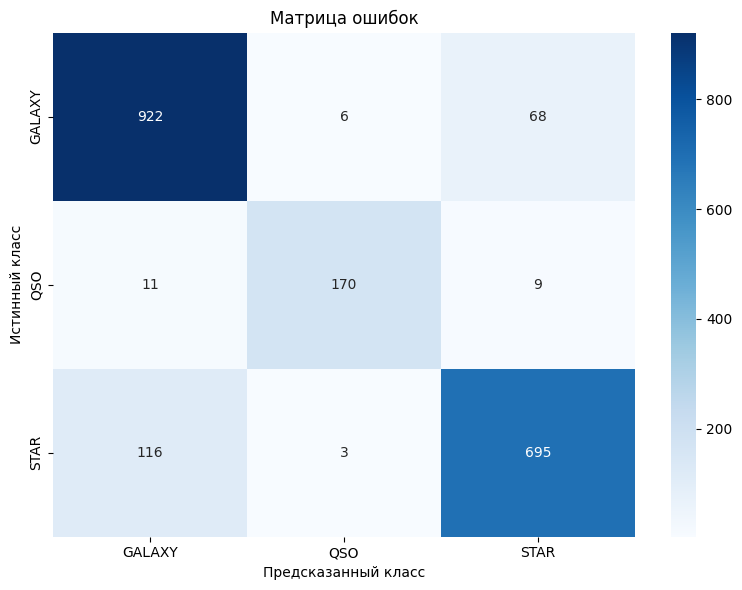

In [22]:
my_rf_classifier = MyRandomForestClassifier(n_estimators=50, max_depth=10, 
                                            min_samples_split=2, random_state=42)
my_rf_classifier.fit(X_train_class.values, y_train_class)
y_pred_my_class = my_rf_classifier.predict(X_test_class.values)

print("Результаты имплементированной модели классификации:")
my_class_metrics = evaluate_classification_model(y_test_class, y_pred_my_class, class_names)

Сравним результаты имплементированной модели с базовым бейзлайном

In [23]:
comparison_my_class = pd.DataFrame({
    'Модель': ['Базовый бейзлайн (sklearn)', 'Имплементированная модель'],
    'Accuracy': [class_metrics['accuracy'], my_class_metrics['accuracy']],
    'Macro F1': [class_metrics['macro_f1'], my_class_metrics['macro_f1']]
})

print("Сравнение имплементированной модели с базовым бейзлайном:")
print(comparison_my_class.to_string(index=False))

Сравнение имплементированной модели с базовым бейзлайном:
                    Модель  Accuracy  Macro F1
Базовый бейзлайн (sklearn)    0.9900  0.983610
 Имплементированная модель    0.8935  0.899846


Теперь применим техники из улучшенного бейзлайна

Результаты имплементированной модели с улучшениями:
1. Accuracy: 0.9400

2. Метрики по классам:
 Класс  Precision   Recall  F1-score
GALAXY   0.947686 0.945783  0.946734
   QSO   0.955056 0.894737  0.923913
  STAR   0.927536 0.943489  0.935445

3. Macro F1: 0.9354

4. Матрица ошибок:
        GALAXY  QSO  STAR
GALAXY     942    4    50
QSO         10  170    10
STAR        42    4   768


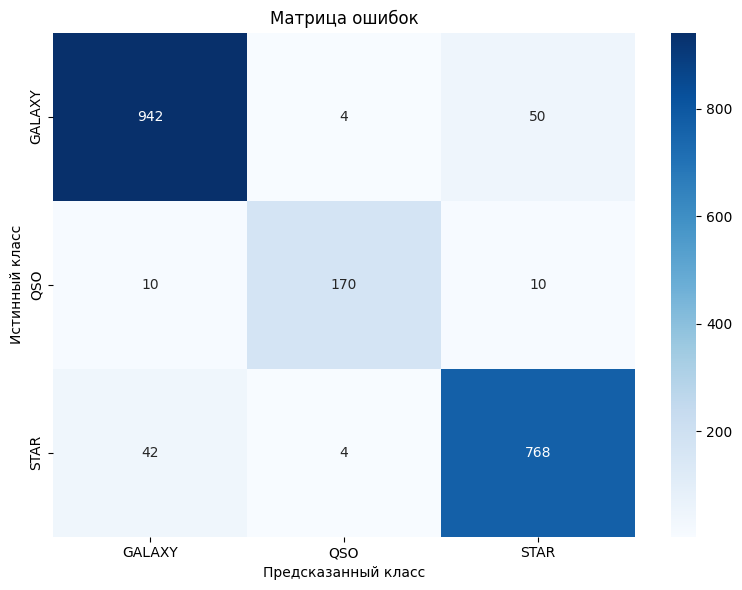

In [24]:
best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth'] if grid_search.best_params_['max_depth'] is not None else 20
best_min_samples_split = grid_search.best_params_['min_samples_split']

my_rf_classifier_improved = MyRandomForestClassifier(
    n_estimators=min(best_n_estimators, 50),
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    random_state=42
)
my_rf_classifier_improved.fit(X_train_class.values, y_train_class)
y_pred_my_class_improved = my_rf_classifier_improved.predict(X_test_class.values)

print("Результаты имплементированной модели с улучшениями:")
my_class_metrics_improved = evaluate_classification_model(y_test_class, y_pred_my_class_improved, class_names)

Сравним результаты имплементированной модели с улучшенным бейзлайном

In [25]:
comparison_my_class_final = pd.DataFrame({
    'Модель': ['Улучшенный бейзлайн (sklearn)', 'Имплементированная модель с улучшениями'],
    'Accuracy': [class_metrics_improved['accuracy'], my_class_metrics_improved['accuracy']],
    'Macro F1': [class_metrics_improved['macro_f1'], my_class_metrics_improved['macro_f1']]
})

print("Сравнение имплементированной модели с улучшенным бейзлайном:")
print(comparison_my_class_final.to_string(index=False))

Сравнение имплементированной модели с улучшенным бейзлайном:
                                 Модель  Accuracy  Macro F1
          Улучшенный бейзлайн (sklearn)    0.9915  0.986153
Имплементированная модель с улучшениями    0.9400  0.935364


### Регрессия

Реализуем алгоритм Random Forest для регрессии

In [26]:
class DecisionTreeRegressor:
    def __init__(self, max_depth=10, min_samples_split=2, random_state=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.random_state = random_state
        self.tree = None
        
    def _mse(self, y):
        if len(y) == 0:
            return 0
        return np.mean((y - np.mean(y)) ** 2)
    
    def _split(self, X, y, feature_idx, threshold):
        left_mask = X[:, feature_idx] <= threshold
        right_mask = ~left_mask
        return left_mask, right_mask
    
    def _best_split(self, X, y, feature_indices):
        best_mse = float('inf')
        best_feature = None
        best_threshold = None
        
        for feature_idx in feature_indices:
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_mask, right_mask = self._split(X, y, feature_idx, threshold)
                
                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue
                
                left_mse = self._mse(y[left_mask])
                right_mse = self._mse(y[right_mask])
                
                weighted_mse = (np.sum(left_mask) * left_mse + 
                              np.sum(right_mask) * right_mse) / len(y)
                
                if weighted_mse < best_mse:
                    best_mse = weighted_mse
                    best_feature = feature_idx
                    best_threshold = threshold
        
        return best_feature, best_threshold
    
    def _build_tree(self, X, y, depth, feature_indices):
        if depth >= self.max_depth or len(y) < self.min_samples_split:
            return np.mean(y)
        
        if len(np.unique(y)) == 1:
            return y[0]
        
        best_feature, best_threshold = self._best_split(X, y, feature_indices)
        
        if best_feature is None:
            return np.mean(y)
        
        left_mask, right_mask = self._split(X, y, best_feature, best_threshold)
        
        tree = {
            'feature': best_feature,
            'threshold': best_threshold,
            'left': self._build_tree(X[left_mask], y[left_mask], depth + 1, feature_indices),
            'right': self._build_tree(X[right_mask], y[right_mask], depth + 1, feature_indices)
        }
        
        return tree
    
    def _predict_sample(self, x, tree):
        if isinstance(tree, dict):
            if x[tree['feature']] <= tree['threshold']:
                return self._predict_sample(x, tree['left'])
            else:
                return self._predict_sample(x, tree['right'])
        else:
            return tree
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        feature_indices = list(range(X.shape[1]))
        self.tree = self._build_tree(X, y, 0, feature_indices)
        return self
    
    def predict(self, X):
        X = np.array(X)
        predictions = []
        for x in X:
            predictions.append(self._predict_sample(x, self.tree))
        return np.array(predictions)


class MyRandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=10, min_samples_split=2, 
                 max_features='sqrt', random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []
        self.feature_indices_list = []
        
    def _bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]
    
    def _get_feature_indices(self, n_features):
        if self.max_features == 'sqrt':
            n_selected = int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            n_selected = int(np.log2(n_features))
        else:
            n_selected = self.max_features
        
        return np.random.choice(n_features, n_selected, replace=False)
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_features = X.shape[1]
        
        if self.random_state is not None:
            np.random.seed(self.random_state)
        
        for i in range(self.n_estimators):
            X_boot, y_boot = self._bootstrap_sample(X, y)

            feature_indices = self._get_feature_indices(n_features)
            self.feature_indices_list.append(feature_indices)

            tree = DecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                random_state=self.random_state
            )
            tree.fit(X_boot[:, feature_indices], y_boot)
            self.trees.append(tree)
        
        return self
    
    def predict(self, X):
        X = np.array(X)
        predictions = []
        
        for x in X:
            tree_predictions = []
            for i, tree in enumerate(self.trees):
                feature_indices = self.feature_indices_list[i]
                tree_pred = tree._predict_sample(x[feature_indices], tree.tree)
                tree_predictions.append(tree_pred)
            
            predictions.append(np.mean(tree_predictions))
        
        return np.array(predictions)

Обучим имплементированную модель на исходных данных

In [27]:
my_rf_regressor = MyRandomForestRegressor(n_estimators=50, max_depth=10, 
                                         min_samples_split=2, random_state=42)
my_rf_regressor.fit(X_train_reg.values, y_train_reg.values)
y_pred_my_reg = my_rf_regressor.predict(X_test_reg.values)

print("Результаты имплементированной модели регрессии:")
my_reg_metrics = evaluate_regression_model(y_test_reg, y_pred_my_reg)

Результаты имплементированной модели регрессии:
1. MAE: 1.7823

2. MSE: 6.2573

3. RMSE: 2.5015

4. R²: 0.4220


Сравним результаты имплементированной модели с базовым бейзлайном

In [28]:
comparison_my_reg = pd.DataFrame({
    'Модель': ['Базовый бейзлайн (sklearn)', 'Имплементированная модель'],
    'MAE': [reg_metrics['mae'], my_reg_metrics['mae']],
    'RMSE': [reg_metrics['rmse'], my_reg_metrics['rmse']],
    'R²': [reg_metrics['r2'], my_reg_metrics['r2']]
})

print("Сравнение имплементированной модели с базовым бейзлайном:")
print(comparison_my_reg.to_string(index=False))

Сравнение имплементированной модели с базовым бейзлайном:
                    Модель      MAE     RMSE       R²
Базовый бейзлайн (sklearn) 1.589928 2.256425 0.529667
 Имплементированная модель 1.782342 2.501466 0.421967


Теперь применим техники из улучшенного бейзлайна

In [29]:
best_n_estimators_reg = grid_search_reg.best_params_['n_estimators']
best_max_depth_reg = grid_search_reg.best_params_['max_depth'] if grid_search_reg.best_params_['max_depth'] is not None else 20
best_min_samples_split_reg = grid_search_reg.best_params_['min_samples_split']

my_rf_regressor_improved = MyRandomForestRegressor(
    n_estimators=min(best_n_estimators_reg, 50),
    max_depth=best_max_depth_reg,
    min_samples_split=best_min_samples_split_reg,
    random_state=42
)
my_rf_regressor_improved.fit(X_train_reg_features.values, y_train_reg.values)
y_pred_my_reg_improved = my_rf_regressor_improved.predict(X_test_reg_features.values)

print("Результаты имплементированной модели с улучшениями:")
my_reg_metrics_improved = evaluate_regression_model(y_test_reg, y_pred_my_reg_improved)

Результаты имплементированной модели с улучшениями:
1. MAE: 1.6099

2. MSE: 5.1879

3. RMSE: 2.2777

4. R²: 0.5208


Сравним результаты имплементированной модели с улучшенным бейзлайном

In [30]:
comparison_my_reg_final = pd.DataFrame({
    'Модель': ['Улучшенный бейзлайн (sklearn)', 'Имплементированная модель с улучшениями'],
    'MAE': [reg_metrics_improved['mae'], my_reg_metrics_improved['mae']],
    'RMSE': [reg_metrics_improved['rmse'], my_reg_metrics_improved['rmse']],
    'R²': [reg_metrics_improved['r2'], my_reg_metrics_improved['r2']]
})

print("Сравнение имплементированной модели с улучшенным бейзлайном:")
print(comparison_my_reg_final.to_string(index=False))

Сравнение имплементированной модели с улучшенным бейзлайном:
                                 Модель      MAE     RMSE       R²
          Улучшенный бейзлайн (sklearn) 1.519789 2.153528 0.571585
Имплементированная модель с улучшениями 1.609885 2.277700 0.520756


## Общие выводы по результатам всех моделей

Сравним все 4 модели для классификации и регрессии: базовый бейзлайн из sklearn, имплементированную модель базового бейзлайна, модель с улучшенным бейзлайном из sklearn и имплементированную модель улучшенного бейзлайна.

### Классификация

In [31]:
final_comparison_class = pd.DataFrame({
    'Модель': [
        'Базовый бейзлайн (sklearn)',
        'Имплементированная модель базового бейзлайна',
        'Улучшенный бейзлайн (sklearn)',
        'Имплементированная модель улучшенного бейзлайна'
    ],
    'Accuracy': [
        class_metrics['accuracy'],
        my_class_metrics['accuracy'],
        class_metrics_improved['accuracy'],
        my_class_metrics_improved['accuracy']
    ],
    'Macro F1': [
        class_metrics['macro_f1'],
        my_class_metrics['macro_f1'],
        class_metrics_improved['macro_f1'],
        my_class_metrics_improved['macro_f1']
    ]
})

print("ОБЩЕЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ КЛАССИФИКАЦИИ")
print(final_comparison_class.to_string(index=False))

print("\nВЫВОДЫ ПО КЛАССИФИКАЦИИ:")
print(f"1. Базовый бейзлайн (sklearn): Accuracy = {class_metrics['accuracy']:.4f}, Macro F1 = {class_metrics['macro_f1']:.4f}")
print(f"2. Имплементированная модель базового бейзлайна: Accuracy = {my_class_metrics['accuracy']:.4f}, Macro F1 = {my_class_metrics['macro_f1']:.4f}")
print(f"3. Улучшенный бейзлайн (sklearn): Accuracy = {class_metrics_improved['accuracy']:.4f}, Macro F1 = {class_metrics_improved['macro_f1']:.4f}")
print(f"4. Имплементированная модель улучшенного бейзлайна: Accuracy = {my_class_metrics_improved['accuracy']:.4f}, Macro F1 = {my_class_metrics_improved['macro_f1']:.4f}")
print("\nУлучшение базового бейзлайна (sklearn) → улучшенный бейзлайн (sklearn):")
print(f"  Accuracy: {((class_metrics_improved['accuracy'] - class_metrics['accuracy']) / class_metrics['accuracy'] * 100):.2f}%")
print(f"  Macro F1: {((class_metrics_improved['macro_f1'] - class_metrics['macro_f1']) / class_metrics['macro_f1'] * 100):.2f}%")
print("\nСравнение имплементированной модели с sklearn (улучшенный бейзлайн):")
print(f"  Разница в Accuracy: {abs(class_metrics_improved['accuracy'] - my_class_metrics_improved['accuracy']):.6f}")
print(f"  Разница в Macro F1: {abs(class_metrics_improved['macro_f1'] - my_class_metrics_improved['macro_f1']):.6f}")

ОБЩЕЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ КЛАССИФИКАЦИИ
                                         Модель  Accuracy  Macro F1
                     Базовый бейзлайн (sklearn)    0.9900  0.983610
   Имплементированная модель базового бейзлайна    0.8935  0.899846
                  Улучшенный бейзлайн (sklearn)    0.9915  0.986153
Имплементированная модель улучшенного бейзлайна    0.9400  0.935364

ВЫВОДЫ ПО КЛАССИФИКАЦИИ:
1. Базовый бейзлайн (sklearn): Accuracy = 0.9900, Macro F1 = 0.9836
2. Имплементированная модель базового бейзлайна: Accuracy = 0.8935, Macro F1 = 0.8998
3. Улучшенный бейзлайн (sklearn): Accuracy = 0.9915, Macro F1 = 0.9862
4. Имплементированная модель улучшенного бейзлайна: Accuracy = 0.9400, Macro F1 = 0.9354

Улучшение базового бейзлайна (sklearn) → улучшенный бейзлайн (sklearn):
  Accuracy: 0.15%
  Macro F1: 0.26%

Сравнение имплементированной модели с sklearn (улучшенный бейзлайн):
  Разница в Accuracy: 0.051500
  Разница в Macro F1: 0.050790


### Регрессия

In [32]:
final_comparison_reg = pd.DataFrame({
    'Модель': [
        'Базовый бейзлайн (sklearn)',
        'Имплементированная модель базового бейзлайна',
        'Улучшенный бейзлайн (sklearn)',
        'Имплементированная модель улучшенного бейзлайна'
    ],
    'MAE': [
        reg_metrics['mae'],
        my_reg_metrics['mae'],
        reg_metrics_improved['mae'],
        my_reg_metrics_improved['mae']
    ],
    'RMSE': [
        reg_metrics['rmse'],
        my_reg_metrics['rmse'],
        reg_metrics_improved['rmse'],
        my_reg_metrics_improved['rmse']
    ],
    'R²': [
        reg_metrics['r2'],
        my_reg_metrics['r2'],
        reg_metrics_improved['r2'],
        my_reg_metrics_improved['r2']
    ]
})

print("ОБЩЕЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ РЕГРЕССИИ")
print(final_comparison_reg.to_string(index=False))

print("\nВЫВОДЫ ПО РЕГРЕССИИ:")
print(f"1. Базовый бейзлайн (sklearn): MAE = {reg_metrics['mae']:.4f}, RMSE = {reg_metrics['rmse']:.4f}, R² = {reg_metrics['r2']:.4f}")
print(f"2. Имплементированная модель базового бейзлайна: MAE = {my_reg_metrics['mae']:.4f}, RMSE = {my_reg_metrics['rmse']:.4f}, R² = {my_reg_metrics['r2']:.4f}")
print(f"3. Улучшенный бейзлайн (sklearn): MAE = {reg_metrics_improved['mae']:.4f}, RMSE = {reg_metrics_improved['rmse']:.4f}, R² = {reg_metrics_improved['r2']:.4f}")
print(f"4. Имплементированная модель улучшенного бейзлайна: MAE = {my_reg_metrics_improved['mae']:.4f}, RMSE = {my_reg_metrics_improved['rmse']:.4f}, R² = {my_reg_metrics_improved['r2']:.4f}")
print("\nУлучшение базового бейзлайна (sklearn) → улучшенный бейзлайн (sklearn):")
print(f"  MAE: {((reg_metrics['mae'] - reg_metrics_improved['mae']) / reg_metrics['mae'] * 100):.2f}% улучшение")
print(f"  RMSE: {((reg_metrics['rmse'] - reg_metrics_improved['rmse']) / reg_metrics['rmse'] * 100):.2f}% улучшение")
print(f"  R²: {((reg_metrics_improved['r2'] - reg_metrics['r2']) / abs(reg_metrics['r2']) * 100):.2f}% улучшение")
print("\nСравнение имплементированной модели с sklearn (улучшенный бейзлайн):")
print(f"  Разница в MAE: {abs(reg_metrics_improved['mae'] - my_reg_metrics_improved['mae']):.6f}")
print(f"  Разница в RMSE: {abs(reg_metrics_improved['rmse'] - my_reg_metrics_improved['rmse']):.6f}")
print(f"  Разница в R²: {abs(reg_metrics_improved['r2'] - my_reg_metrics_improved['r2']):.6f}")

ОБЩЕЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ РЕГРЕССИИ
                                         Модель      MAE     RMSE       R²
                     Базовый бейзлайн (sklearn) 1.589928 2.256425 0.529667
   Имплементированная модель базового бейзлайна 1.782342 2.501466 0.421967
                  Улучшенный бейзлайн (sklearn) 1.519789 2.153528 0.571585
Имплементированная модель улучшенного бейзлайна 1.609885 2.277700 0.520756

ВЫВОДЫ ПО РЕГРЕССИИ:
1. Базовый бейзлайн (sklearn): MAE = 1.5899, RMSE = 2.2564, R² = 0.5297
2. Имплементированная модель базового бейзлайна: MAE = 1.7823, RMSE = 2.5015, R² = 0.4220
3. Улучшенный бейзлайн (sklearn): MAE = 1.5198, RMSE = 2.1535, R² = 0.5716
4. Имплементированная модель улучшенного бейзлайна: MAE = 1.6099, RMSE = 2.2777, R² = 0.5208

Улучшение базового бейзлайна (sklearn) → улучшенный бейзлайн (sklearn):
  MAE: 4.41% улучшение
  RMSE: 4.56% улучшение
  R²: 7.91% улучшение

Сравнение имплементированной модели с sklearn (улучшенный бейзлайн):
  Разница в MAE: 0.090